#Machine Learning - Regression
##Assignemnt 3
###Rhichard Koh

#Part A Apply SFS (Sequential Feature Selection) using the code in  module. Explore the results using 1-5 values for 'k_features', and 'forward'. Visualize the results.

In [3]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.8 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [4]:

from sklearn.datasets import fetch_california_housing
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression, Ridge
import matplotlib.pyplot as plt

california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame

X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

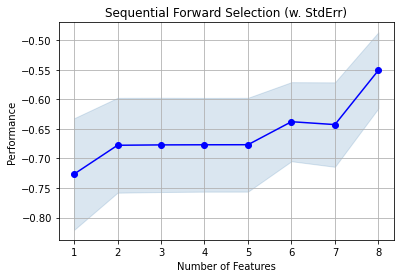

In [5]:
lr = LinearRegression()

sfs = SFS(lr, 
          k_features=8, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

##Explore the results using 1-5 values for 'k_features', and 'forward'. Visualize the results.

k_features=1, forward=True
Features Selected:('MedInc',)


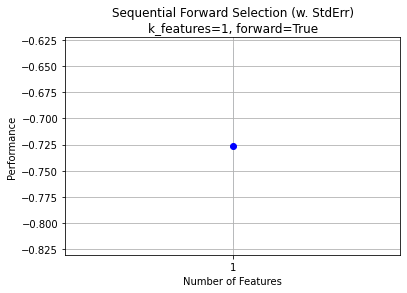

k_features=2, forward=True
Features Selected:('MedInc', 'HouseAge')


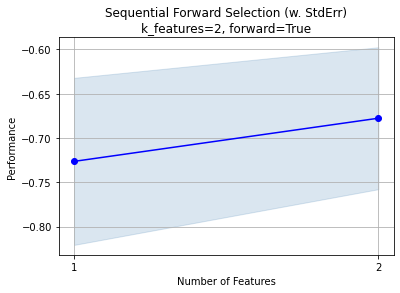

k_features=3, forward=True
Features Selected:('MedInc', 'HouseAge', 'AveOccup')


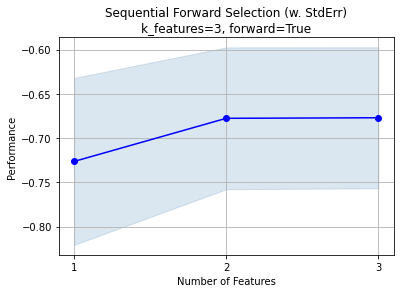

k_features=4, forward=True
Features Selected:('MedInc', 'HouseAge', 'Population', 'AveOccup')


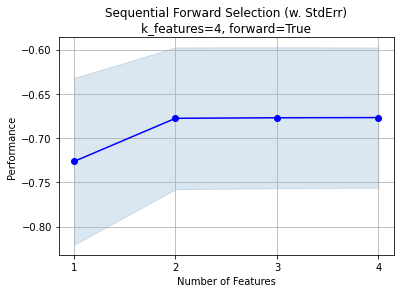

k_features=5, forward=True
Features Selected:('MedInc', 'HouseAge', 'AveBedrms', 'Population', 'AveOccup')


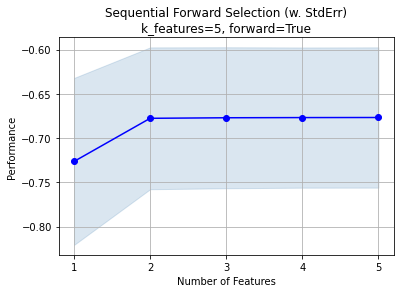

In [7]:
for i in range(1,6):
  print(f"k_features={i}, forward=True")
  lr = LinearRegression()
  sfs = SFS(lr, 
            k_features=i, 
            forward=True, 
            floating=False, 
            scoring='neg_mean_squared_error',
            cv=10)
  sfs = sfs.fit(X, y)
  fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
  print(f"Features Selected:{sfs.k_feature_names_}")
  plt.title(f'Sequential Forward Selection (w. StdErr)\nk_features={i}, forward=True')
  plt.grid()
  plt.show()

# Part B Apply ridge regression to control the collinearity issue. Compare the solution with standard regression model. Reproduce the problem given in lecture slides.

In [11]:
example = pd.DataFrame(
    {
        'x1':[1,2,3,4,5,6,7,8,9,10],
        'x2':[2,4,6,7,7,7,8,10,12,13],
        'x3':[1,2,4,3,2,1,1,2,4,3],
        'y':[3,9,11,15,13,13,17,21,25,27]
    }
)

x = example.drop(columns=['y'])
y = example['y']

In [12]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x,y)
print(LR.intercept_,LR.coef_)

-1.4645509790681697 [-1.28494261  3.42538825 -0.91357191]


In [13]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=2)
ridge.fit(x,y)
print(ridge.intercept_,ridge.coef_)

-0.5365946875597079 [0.63825721 1.51901395 0.38333652]


In [15]:
import numpy as np

def ridge(X,y,lamb):
  X_np = X.to_numpy()
  y_np = y.to_numpy()
  ones = np.ones(len(X))
  X_np = np.concatenate((ones[:, np.newaxis], X_np), axis=1)
  identity = np.identity(X_np.shape[1])
  Xt = X_np.transpose()
  first_part = np.dot(Xt,X_np) + lamb*identity
  first_part = np.linalg.inv(first_part)
  second_part = np.dot(Xt, y_np)
  return np.dot(first_part,second_part)

def normal_eq_lm(X,y):
  X_np = X.to_numpy()
  y_np = y.to_numpy()
  ones = np.ones(len(X))
  X_np = np.concatenate((ones[:, np.newaxis], X_np), axis=1)
  Xt = X_np.transpose()
  first_part = np.dot(Xt,X_np)
  first_part = np.linalg.inv(first_part)
  second_part = np.dot(Xt, y_np)
  return np.dot(first_part,second_part)

In [20]:
print(f'ridge regression: {ridge(x,y,1)}')
print(f'linear regression: {normal_eq_lm(x,y)}')

ridge regression: [-0.40383048  0.49205379  1.64832926  0.26548492]
linear regression: [-1.46455098 -1.28494261  3.42538825 -0.91357191]


Therefore, ridge regression helped control the collinearity issue.